In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import joblib


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [265]:
df = pd.read_excel(r"C:\Users\pravi\Documents\nikhil_project\Book1.xlsx")
df

,Date,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
0,2020-01-01,59.746333,916154.106622,48.965459,52.232315
1,2020-01-02,14.017123,978116.660674,49.617604,52.190672
2,2020-01-03,12.302963,15696.133135,50.948596,52.389854
3,2020-01-04,11.573981,666210.118867,51.439419,52.656657
4,2020-01-05,90.893874,835636.264069,51.926821,53.069813
...,...,...,...,...,...
2495,2026-10-31,14.093895,389125.499888,28.138658,28.138658
2496,2026-11-01,20.937880,734552.817679,31.649849,31.649849
2497,2026-11-02,65.413928,547989.382303,35.220505,35.220505
2498,2026-11-03,22.253731,49614.739118,20.123793,20.123793


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2500 non-null   datetime64[ns]
 1   Closing Volume          2500 non-null   float64       
 2   Volume                  2500 non-null   float64       
 3   50-Day Moving Average   2500 non-null   float64       
 4   200-Day Moving Average  2500 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 97.8 KB


In [4]:
df.describe()

,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,50.578901,500098.652390,50.476556,50.387707
std,28.683850,290958.820250,4.286788,2.640274
min,0.021902,193.305764,17.993856,17.993856
25%,26.228148,252445.797853,47.618018,48.591755
50%,50.870300,486105.265525,50.496660,50.622677
75%,74.861114,754871.289065,53.286231,52.201444
max,99.996835,999860.234122,63.433106,56.600309


In [12]:
df.isna().sum()  #no duplicates & no missing values found

Date                      0
Closing Volume            0
Volume                    0
50-Day Moving Average     0
200-Day Moving Average    0
dtype: int64

In [17]:
df.var()

Closing Volume            8.227633e+02
Volume                    8.465704e+10
50-Day Moving Average     1.837655e+01
200-Day Moving Average    6.971048e+00
dtype: float64

In [18]:
df.skew() #apart from closing volume everything is a positively skewed

Closing Volume           -0.007613
Volume                    0.015079
50-Day Moving Average    -0.315748
200-Day Moving Average   -2.175570
dtype: float64

In [19]:
df.kurt() # some are positively kurtosis and some are negative kurtosis

Closing Volume            -1.176532
Volume                    -1.201978
50-Day Moving Average      2.449519
200-Day Moving Average    19.898606
dtype: float64

In [20]:
df.std()

Date                      721 days 19:58:18.591466848
Closing Volume                               28.68385
Volume                                   290958.82025
50-Day Moving Average                        4.286788
200-Day Moving Average                       2.640274
dtype: object

In [21]:
df.mean()

Closing Volume                50.578901
Volume                    500098.652390
50-Day Moving Average         50.476556
200-Day Moving Average        50.387707
dtype: float64

In [22]:
df.median()  

Closing Volume                50.870300
Volume                    486105.265525
50-Day Moving Average         50.496660
200-Day Moving Average        50.622677
dtype: float64

In [23]:
df.corr() # every column is independent and has no correlation b/w each other

,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
Closing Volume,1.000000,0.003137,0.149871,0.091112
Volume,0.003137,1.000000,-0.001326,0.002685
50-Day Moving Average,0.149871,-0.001326,1.000000,0.636954
200-Day Moving Average,0.091112,0.002685,0.636954,1.000000


### Data Preprocessing

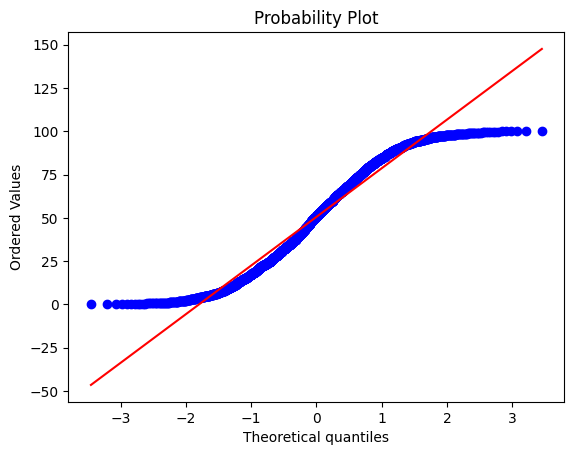

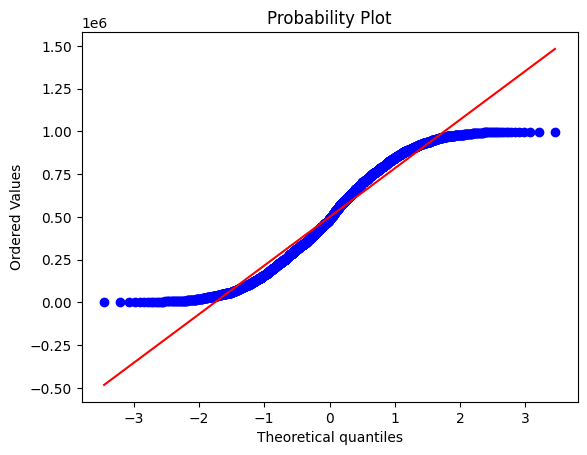

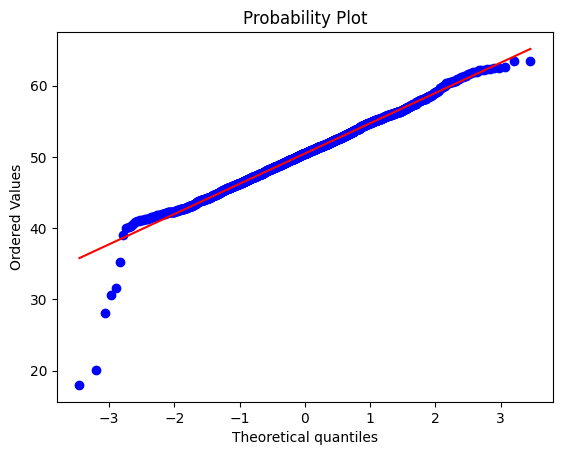

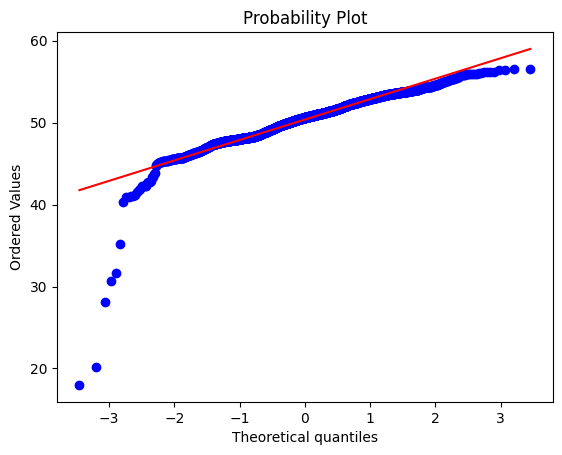

In [29]:
import scipy.stats as stats 
import pylab
bins_length = np.linspace(0,200,40)

stats.probplot(df['Closing Volume'], dist = 'norm', plot = pylab)
plt.show()
stats.probplot(df['Volume'], dist = 'norm', plot = pylab)
plt.show()
stats.probplot(df['50-Day Moving Average'], dist = 'norm', plot = pylab)
plt.show()
stats.probplot(df['200-Day Moving Average'], dist = 'norm', plot = pylab)
plt.show()

In [27]:
# except volume and closing volume other two columns are normally distributed
# volume and closing volume columns are distributed in a sigmoid form

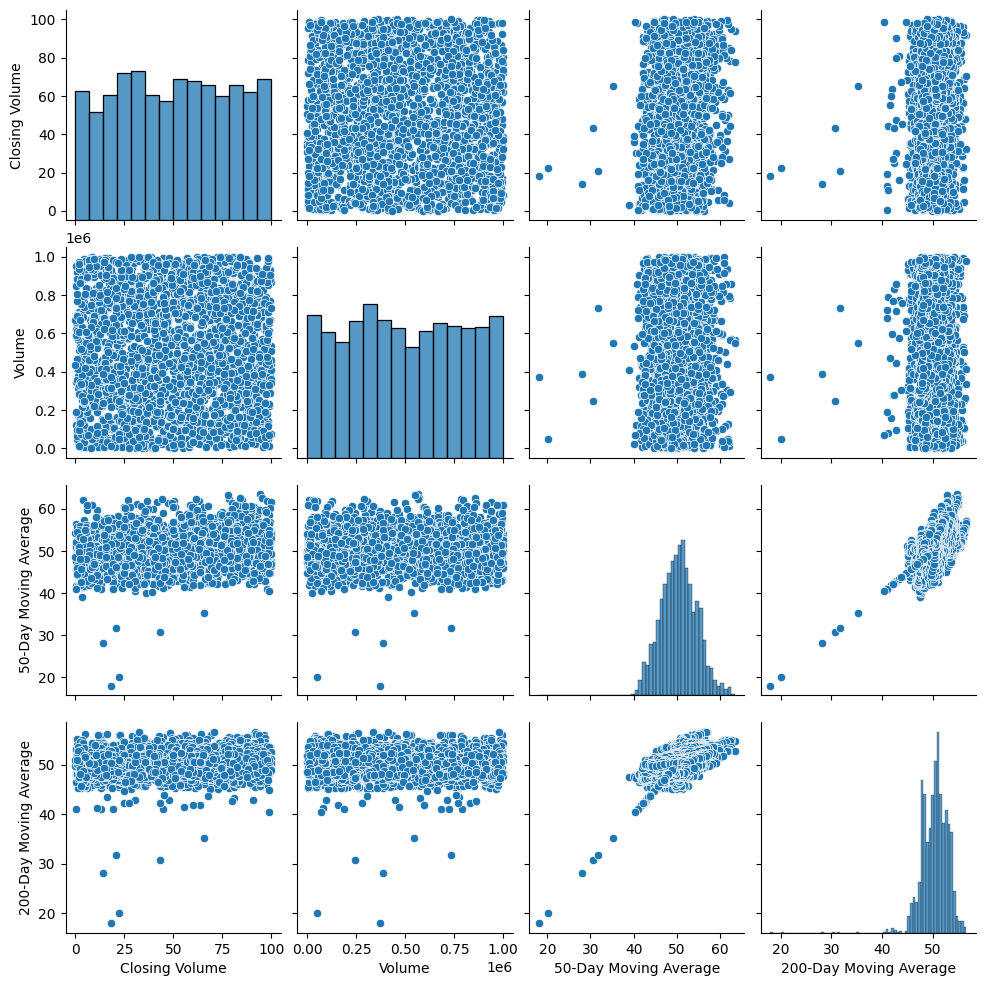

In [28]:
sns.pairplot(df)

<AxesSubplot: >

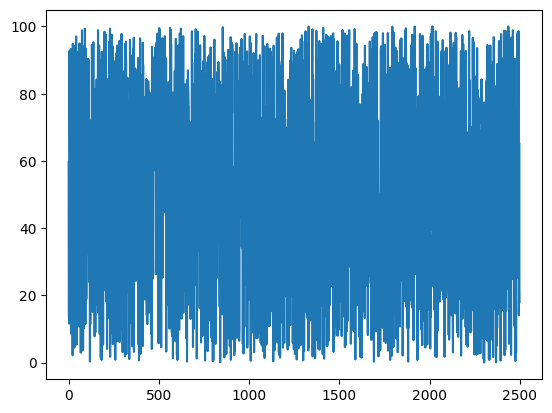

In [37]:
df['Closing Volume'].plot()

Closing Volume               AxesSubplot(0.125,0.11;0.168478x0.77)
Volume                    AxesSubplot(0.327174,0.11;0.168478x0.77)
50-Day Moving Average     AxesSubplot(0.529348,0.11;0.168478x0.77)
200-Day Moving Average    AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

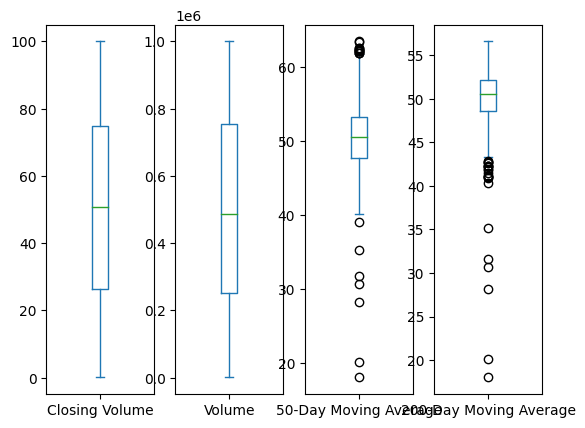

In [38]:
df.plot(kind = 'box', sharey = False, subplots = True)

In [40]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['50-Day Moving Average'])
df['50-Day Moving Average'] = winsor.fit_transform(df[['50-Day Moving Average']])


In [47]:
winsor1 = Winsorizer(capping_method = 'iqr', tail = 'left', fold = 1.5, variables = ['200-Day Moving Average'])
df['200-Day Moving Average'] = winsor1.fit_transform(df[['200-Day Moving Average']])

Closing Volume               AxesSubplot(0.125,0.11;0.168478x0.77)
Volume                    AxesSubplot(0.327174,0.11;0.168478x0.77)
50-Day Moving Average     AxesSubplot(0.529348,0.11;0.168478x0.77)
200-Day Moving Average    AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

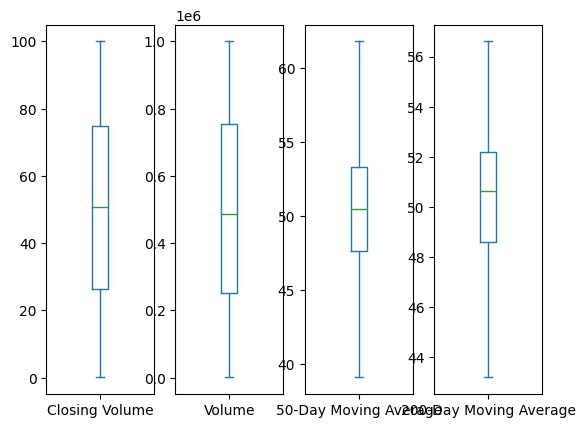

In [48]:
df.plot(kind = 'box', sharey = False, subplots = True)

## Train test split

In [49]:
data = df[['Date','Closing Volume']]
data 

,Date,Closing Volume
0,2020-01-01,59.746333
1,2020-01-02,14.017123
2,2020-01-03,12.302963
3,2020-01-04,11.573981
4,2020-01-05,90.893874
...,...,...
2495,2026-10-31,14.093895
2496,2026-11-01,20.937880
2497,2026-11-02,65.413928
2498,2026-11-03,22.253731


In [54]:
dff = data.set_index('Date')
dff

,Closing Volume
Date,
2020-01-01,59.746333
2020-01-02,14.017123
2020-01-03,12.302963
2020-01-04,11.573981
2020-01-05,90.893874
...,...
2026-10-31,14.093895
2026-11-01,20.937880
2026-11-02,65.413928


In [65]:
dff = dff.resample('W').mean()
dff

,Closing Volume
Date,
2020-01-05,37.706855
2020-01-12,58.861535
2020-01-19,57.495570
2020-01-26,56.766915
2020-02-02,38.472842
...,...
2026-10-11,40.649832
2026-10-18,27.479415
2026-10-25,53.016199


In [66]:
df_train = dff.iloc[:-52,:]
df_train

,Closing Volume
Date,
2020-01-05,37.706855
2020-01-12,58.861535
2020-01-19,57.495570
2020-01-26,56.766915
2020-02-02,38.472842
...,...
2025-10-12,43.948960
2025-10-19,66.300836
2025-10-26,37.340033


In [67]:
df_test = dff.iloc[-52:,:]
df_test

,Closing Volume
Date,
2025-11-16,59.199173
2025-11-23,40.226675
2025-11-30,35.996772
2025-12-07,44.341856
2025-12-14,59.936792
2025-12-21,38.369618
2025-12-28,64.299000
2026-01-04,55.538840
2026-01-11,60.210605


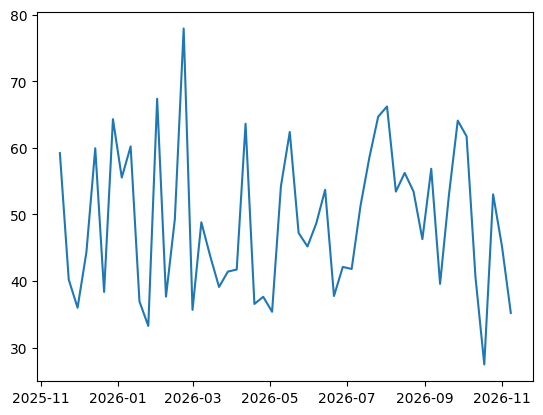

In [70]:
plt.plot(df_test['Closing Volume'])

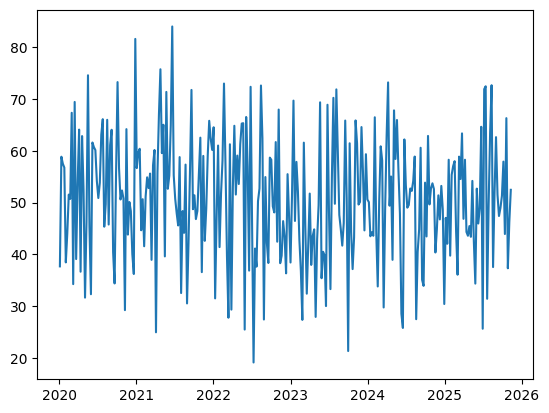

In [69]:
plt.plot(df_train['Closing Volume'])

## Model Building

In [71]:
window_size = 52
rolling_mean = df_train['Closing Volume'].rolling(window_size).mean()
rolling_mean

Date
2020-01-05          NaN
2020-01-12          NaN
2020-01-19          NaN
2020-01-26          NaN
2020-02-02          NaN
                ...    
2025-10-12    50.099302
2025-10-19    50.419320
2025-10-26    50.122748
2025-11-02    49.979566
2025-11-09    49.976885
Freq: W-SUN, Name: Closing Volume, Length: 306, dtype: float64

In [72]:
# Define the forecast horizon
forecast_horizon = 52 #orecast for the next 52 weeks

# Calculate the start and end dates of the forecast period
last_date = df_train.index[-1]
forecast_start_date = last_date + pd.offsets.MonthEnd(1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=forecast_horizon-1)

# Generate the forecast by calculating the rolling mean for each forecast period
forecast = []
for i in range(forecast_horizon):
    # Get the rolling mean for the current forecast period
    forecast_start_index = len(rolling_mean) - window_size + i
    forecast_end_index = forecast_start_index + window_size
    forecast_mean = rolling_mean.iloc[forecast_start_index:forecast_end_index].mean()

    # Add the forecast mean to the list of forecasts
    forecast.append(forecast_mean)

# Create a Series with the forecast values and the corresponding dates
forecast_index = pd.date_range(forecast_start_date, forecast_end_date, freq='W')
forecast = pd.Series(forecast, index=forecast_index)

forecast

ValueError: Length of values (52) does not match length of index (222)

## forecasting with exponential smoothing

In [73]:
from statsmodels.tsa.api import SimpleExpSmoothing



In [74]:
alpha = 0.2

# Apply simple exponential smoothing
model = SimpleExpSmoothing(df_train).fit(smoothing_level=alpha)
forecast = model.forecast(steps=52)

# Print the forecasted values
print(forecast)


2025-11-16    50.463281
2025-11-23    50.463281
2025-11-30    50.463281
2025-12-07    50.463281
2025-12-14    50.463281
2025-12-21    50.463281
2025-12-28    50.463281
2026-01-04    50.463281
2026-01-11    50.463281
2026-01-18    50.463281
2026-01-25    50.463281
2026-02-01    50.463281
2026-02-08    50.463281
2026-02-15    50.463281
2026-02-22    50.463281
2026-03-01    50.463281
2026-03-08    50.463281
2026-03-15    50.463281
2026-03-22    50.463281
2026-03-29    50.463281
2026-04-05    50.463281
2026-04-12    50.463281
2026-04-19    50.463281
2026-04-26    50.463281
2026-05-03    50.463281
2026-05-10    50.463281
2026-05-17    50.463281
2026-05-24    50.463281
2026-05-31    50.463281
2026-06-07    50.463281
2026-06-14    50.463281
2026-06-21    50.463281
2026-06-28    50.463281
2026-07-05    50.463281
2026-07-12    50.463281
2026-07-19    50.463281
2026-07-26    50.463281
2026-08-02    50.463281
2026-08-09    50.463281
2026-08-16    50.463281
2026-08-23    50.463281
2026-08-30    50

## Holte's Winter Exponential smoothing

In [75]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
model = ExponentialSmoothing(df_train, seasonal='add', seasonal_periods = 52)
fit = model.fit()

# Make predictions
pred = fit.forecast(52)
pred

2025-11-16    43.246360
2025-11-23    48.085216
2025-11-30    53.377611
2025-12-07    48.987846
2025-12-14    50.378980
2025-12-21    59.540328
2025-12-28    46.442758
2026-01-04    49.798362
2026-01-11    53.431925
2026-01-18    51.959613
2026-01-25    45.328409
2026-02-01    51.934430
2026-02-08    50.843574
2026-02-15    51.222631
2026-02-22    49.976000
2026-03-01    48.032216
2026-03-08    49.802640
2026-03-15    45.729075
2026-03-22    49.617760
2026-03-29    50.589330
2026-04-05    54.475601
2026-04-12    53.159515
2026-04-19    55.163766
2026-04-26    42.907641
2026-05-03    54.502216
2026-05-10    56.978630
2026-05-17    60.011893
2026-05-24    39.442251
2026-05-31    54.084207
2026-06-07    49.499857
2026-06-14    47.624658
2026-06-21    62.890658
2026-06-28    45.859576
2026-07-05    45.843750
2026-07-12    54.479283
2026-07-19    52.782207
2026-07-26    46.598008
2026-08-02    56.681117
2026-08-09    62.274366
2026-08-16    46.325420
2026-08-23    42.722244
2026-08-30    51

In [77]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(df_test, pred))
print('rmse',rmse*100)

# Compute the MAPE
# calculate the absolute percentage error
ape = np.abs((df_test['Closing Volume'].mean() - pred[0].mean()) / df_test['Closing Volume'].mean())
# calculate the mean absolute percentage error
mape = (ape) * 100
print("MAPE:", mape)

rmse 1219.0812666266995
MAPE: 11.613000312115073


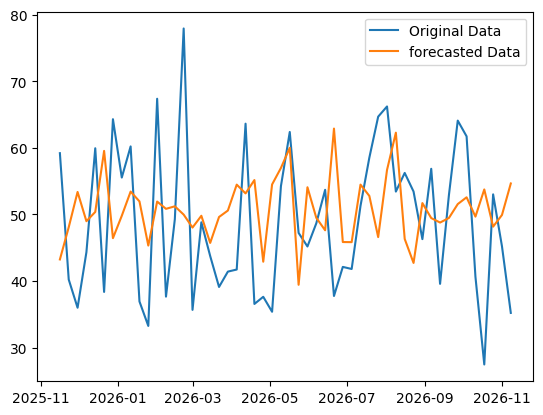

In [78]:
plt.plot(df_test, label='Original Data')
plt.plot(pred, label='forecasted Data')
plt.legend()
plt.show()

## ARIMA

In [79]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

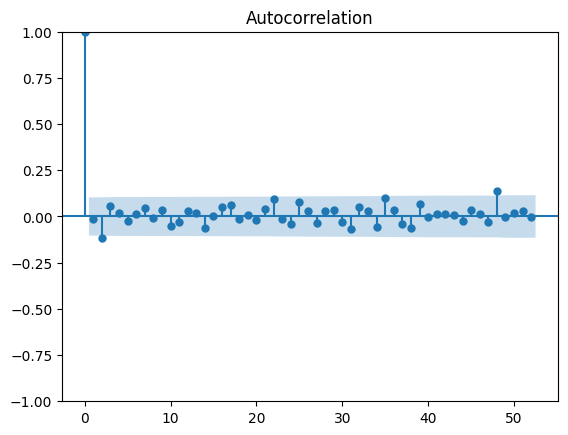

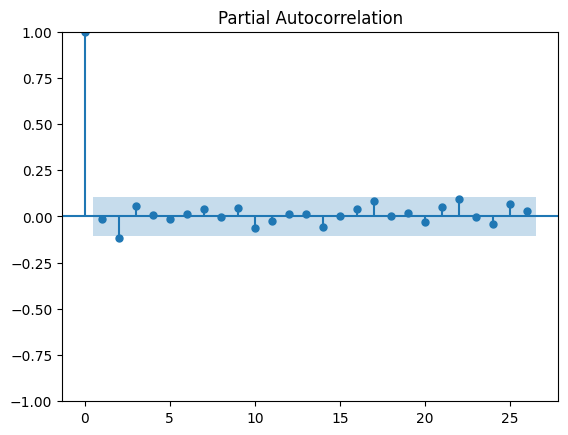

In [82]:
# Plot ACF
plot_acf(dff['Closing Volume'], lags = 52)
plt.show()

# Plot PACF
plot_pacf(dff['Closing Volume'], lags = 26)
plt.show()

In [83]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train['Closing Volume'], order = (1,0,1))
model_fit = model.fit()

In [85]:
#forecast for next 12 weeks
start_index = len(df_train)
start_index
end_index = start_index + 51
forecast_test = model_fit.predict(start = start_index, end = end_index)

print(forecast_test)

2025-11-16    48.871637
2025-11-23    52.623059
2025-11-30    49.130554
2025-12-07    52.382011
2025-12-14    49.354965
2025-12-21    52.173089
2025-12-28    49.549468
2026-01-04    51.992011
2026-01-11    49.718048
2026-01-18    51.835065
2026-01-25    49.864162
2026-02-01    51.699036
2026-02-08    49.990802
2026-02-15    51.581137
2026-02-22    50.100564
2026-03-01    51.478950
2026-03-08    50.195699
2026-03-15    51.390382
2026-03-22    50.278154
2026-03-29    51.313617
2026-04-05    50.349620
2026-04-12    51.247084
2026-04-19    50.411562
2026-04-26    51.189417
2026-05-03    50.465248
2026-05-10    51.139436
2026-05-17    50.511779
2026-05-24    51.096116
2026-05-31    50.552109
2026-06-07    51.058570
2026-06-14    50.587065
2026-06-21    51.026027
2026-06-28    50.617361
2026-07-05    50.997822
2026-07-12    50.643620
2026-07-19    50.973375
2026-07-26    50.666379
2026-08-02    50.952187
2026-08-09    50.686105
2026-08-16    50.933822
2026-08-23    50.703202
2026-08-30    50

In [86]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))
print('rmse',rmse*100)

# Compute the MAPE
# calculate the absolute percentage error
ape = np.abs((df_test['Closing Volume'].mean() - forecast_test[0].mean()) / df_test['Closing Volume'].mean())
# calculate the mean absolute percentage error
mape = (ape) * 100
print("MAPE:", mape)

rmse 1131.8322591704184
MAPE: 0.11604831443346976


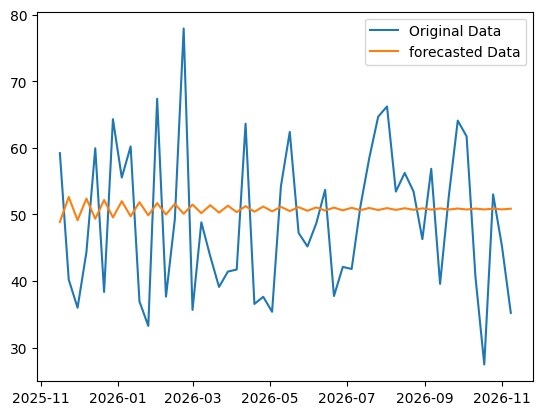

In [88]:
plt.plot(df_test, label='Original Data')
plt.plot(forecast_test, label='forecasted Data')
plt.legend()
plt.show()

## AutoRegression Model

In [100]:
# Specify the AR(p) model
p = 2
model = sm.tsa.AutoReg(df_train, lags = p)

# Fit the model
results = model.fit()

# Forecast the next 52 weeks
ar_forecast = results.predict(start = len(df_train), end = len(df_train) + 51)

# Print the forecasted values
print(ar_forecast)

2025-11-16    51.324445
2025-11-23    50.632980
2025-11-30    50.783012
2025-12-07    50.859730
2025-12-14    50.840508
2025-12-21    50.832057
2025-12-28    50.834487
2026-01-04    50.835411
2026-01-11    50.835107
2026-01-18    50.835007
2026-01-25    50.835045
2026-02-01    50.835056
2026-02-08    50.835051
2026-02-15    50.835050
2026-02-22    50.835050
2026-03-01    50.835050
2026-03-08    50.835050
2026-03-15    50.835050
2026-03-22    50.835050
2026-03-29    50.835050
2026-04-05    50.835050
2026-04-12    50.835050
2026-04-19    50.835050
2026-04-26    50.835050
2026-05-03    50.835050
2026-05-10    50.835050
2026-05-17    50.835050
2026-05-24    50.835050
2026-05-31    50.835050
2026-06-07    50.835050
2026-06-14    50.835050
2026-06-21    50.835050
2026-06-28    50.835050
2026-07-05    50.835050
2026-07-12    50.835050
2026-07-19    50.835050
2026-07-26    50.835050
2026-08-02    50.835050
2026-08-09    50.835050
2026-08-16    50.835050
2026-08-23    50.835050
2026-08-30    50

## Farima Model

In [101]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

2025-11-16    48.871637
2025-11-23    52.623059
2025-11-30    49.130554
2025-12-07    52.382011
2025-12-14    49.354965
2025-12-21    52.173089
2025-12-28    49.549468
2026-01-04    51.992011
2026-01-11    49.718048
2026-01-18    51.835065
2026-01-25    49.864162
2026-02-01    51.699036
2026-02-08    49.990802
2026-02-15    51.581137
2026-02-22    50.100564
2026-03-01    51.478950
2026-03-08    50.195699
2026-03-15    51.390382
2026-03-22    50.278154
2026-03-29    51.313617
2026-04-05    50.349620
2026-04-12    51.247084
2026-04-19    50.411562
2026-04-26    51.189417
2026-05-03    50.465248
2026-05-10    51.139436
2026-05-17    50.511779
2026-05-24    51.096116
2026-05-31    50.552109
2026-06-07    51.058570
2026-06-14    50.587065
2026-06-21    51.026027
2026-06-28    50.617361
2026-07-05    50.997822
2026-07-12    50.643620
2026-07-19    50.973375
2026-07-26    50.666379
2026-08-02    50.952187
2026-08-09    50.686105
2026-08-16    50.933822
2026-08-23    50.703202
2026-08-30    50

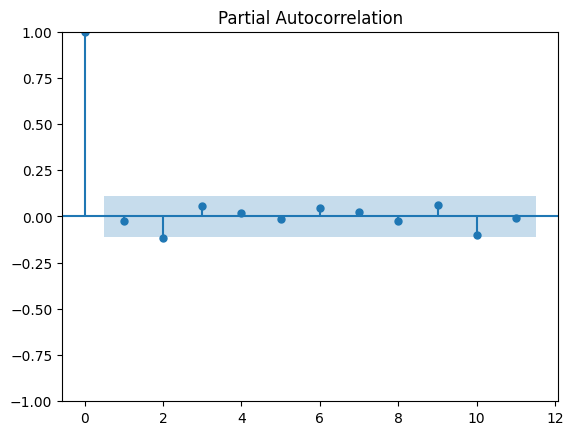

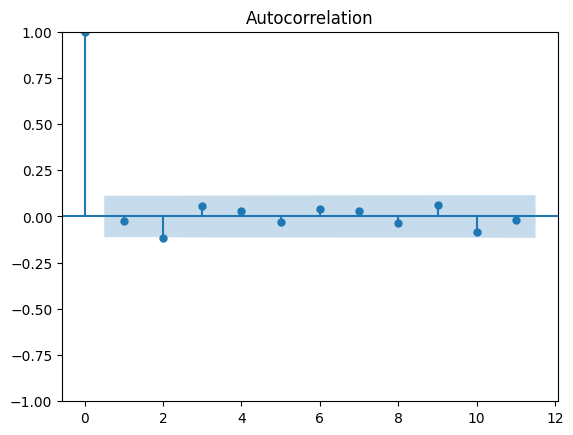

In [104]:
# Check stationarity
result = adfuller(df_train['Closing Volume'])
if result[1] > 0.05:
    # Difference the data
    df_diff = df_train.diff().dropna()
else:
    df_diff = df_train

# Identify the model parameters
pacf = sm.graphics.tsa.plot_pacf(df_diff, lags=11)
acf = sm.graphics.tsa.plot_acf(df_diff, lags=11)
p = 1
d = 0
q = 1

# Fit the FARIMA model
model = ARIMA(df_diff, order=(p, d, q)).fit()

# Make predictions for the next 12 months
preds = model.forecast(steps=52)
preds

In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(df_test, preds))
print('rmse',rmse*100)

# Compute the MAPE
# calculate the absolute percentage error
ape = np.abs((df_test['Closing Volume'].mean() - preds.mean()) / df_test['Closing Volume'].mean())
# calculate the mean absolute percentage error
mape = (ape) * 100
print("MAPE:", mape)

rmse 1131.8322591704184
MAPE: 3.8159725002830602


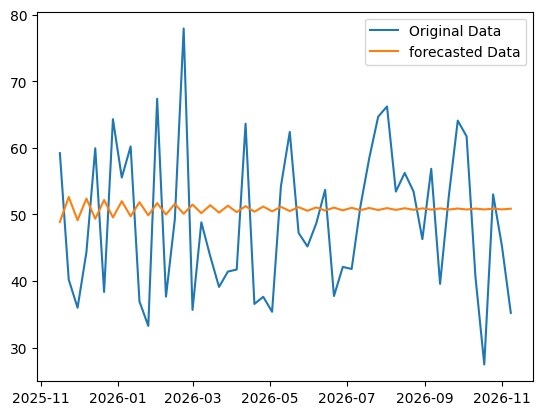

In [106]:
plt.plot(df_test, label='Original Data')
plt.plot(preds, label='forecasted Data')
plt.legend()
plt.show()

## LSTM

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [109]:
# Preprocess and scale the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(df_train)
test_data_scaled = scaler.transform(df_test)


# Reshape the data
sequence_length = 1  # Specify the length of input sequences

X_train = []
y_train = []

for i in range(sequence_length, len(train_data_scaled)):
    X_train.append(train_data_scaled[i - sequence_length:i, 0])
    y_train.append(train_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=1)

Epoch 1/20
305/305 [==============================] - 7s 4ms/step - loss: 0.0666
Epoch 2/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0355
Epoch 3/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0347
Epoch 4/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 5/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0345
Epoch 6/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0340
Epoch 7/20
305/305 [==============================] - 1s 4ms/step - loss: 0.0333
Epoch 8/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0340
Epoch 9/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 10/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0340
Epoch 11/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0344
Epoch 12/20
305/305 [==============================] - 1s 3ms/step - loss: 0.0342
Epoch 13/20
305/305 [====

In [110]:
# Generate forecasts for the next 12 months
forecast = []
last_sequence = train_data_scaled[-sequence_length:, 0]

for _ in range(12):
    next_pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
    forecast.append(next_pred)
    last_sequence = np.concatenate((last_sequence[1:], next_pred), axis=None)

# Scale the forecasted values back to the original range
forecast = np.array(forecast).reshape(-1, 1)
forecast = scaler.inverse_transform(forecast).flatten()

# Print the forecasted values
forecast

1/1 [==============================] - 0s 47ms/step


array([49.550518, 49.627296, 49.62524 , 49.625294, 49.62529 , 49.62529 ,
       49.62529 , 49.62529 , 49.62529 , 49.62529 , 49.62529 , 49.62529 ],
      dtype=float32)

## STL_W

In [112]:
# Load required libraries
import pandas as pd
import pywt
import statsmodels.api as sm

In [157]:
from statsmodels.tsa.seasonal import STL

# Fit the STL-W -model to the training data
stl = STL(df_train, period=52, robust=True, seasonal= 11)
res = stl.fit()

# Get the seasonal and trend components
seasonal = res.seasonal.values
trend = res.trend.values

result = trend + seasonal

# Generate the forecasts for next 52 weeks
forecast_index = pd.date_range(start= df_test.index[0], periods=52, freq='W')
forecast_data = seasonal[:52] + trend[:52]

# Create a new dataframe for the forecasts
forecast = pd.DataFrame({'Sales volume in Tonnes': forecast_data}, index=forecast_index)
forecast

,Sales volume in Tonnes
2025-11-16,45.576242
2025-11-23,55.954432
2025-11-30,55.839117
2025-12-07,51.209270
2025-12-14,40.095775
2025-12-21,38.556662
2025-12-28,49.538053
2026-01-04,51.346996
2026-01-11,59.859939
2026-01-18,37.820458


In [158]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(df_test, forecast))
print('rmse',rmse*100)

# Compute the MAPE
# calculate the absolute percentage error
ape = np.abs((df_test['Closing Volume'].mean() - forecast.mean()) / df_test['Closing Volume'].mean())
# calculate the mean absolute percentage error
mape = (ape) * 100
print("MAPE:", mape)

rmse 1715.6602388757726
MAPE: Sales volume in Tonnes    3.041055
dtype: float64


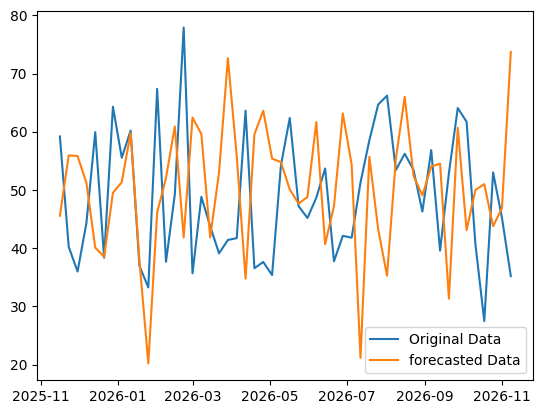

In [159]:
plt.plot(df_test, label='Original Data')
plt.plot(forecast, label='forecasted Data')
plt.legend()
plt.show()

## Multiplicative Holte winter model

In [163]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model to the training data
model = ExponentialSmoothing(df_train, seasonal='Additive', seasonal_periods=52).fit()

# Generate predictions for the next 52 weeks
forecast = model.forecast(52)
forecast


2025-11-16    43.246360
2025-11-23    48.085216
2025-11-30    53.377611
2025-12-07    48.987846
2025-12-14    50.378980
2025-12-21    59.540328
2025-12-28    46.442758
2026-01-04    49.798362
2026-01-11    53.431925
2026-01-18    51.959613
2026-01-25    45.328409
2026-02-01    51.934430
2026-02-08    50.843574
2026-02-15    51.222631
2026-02-22    49.976000
2026-03-01    48.032216
2026-03-08    49.802640
2026-03-15    45.729075
2026-03-22    49.617760
2026-03-29    50.589330
2026-04-05    54.475601
2026-04-12    53.159515
2026-04-19    55.163766
2026-04-26    42.907641
2026-05-03    54.502216
2026-05-10    56.978630
2026-05-17    60.011893
2026-05-24    39.442251
2026-05-31    54.084207
2026-06-07    49.499857
2026-06-14    47.624658
2026-06-21    62.890658
2026-06-28    45.859576
2026-07-05    45.843750
2026-07-12    54.479283
2026-07-19    52.782207
2026-07-26    46.598008
2026-08-02    56.681117
2026-08-09    62.274366
2026-08-16    46.325420
2026-08-23    42.722244
2026-08-30    51

In [164]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(df_test, forecast))
print('rmse',rmse*100)

# Compute the MAPE
# calculate the absolute percentage error
ape = np.abs((df_test['Closing Volume'].mean() - forecast.mean()) / df_test['Closing Volume'].mean())
# calculate the mean absolute percentage error
mape = (ape) * 100
print("MAPE:", mape)

rmse 1219.0812666266995
MAPE: 3.854549383893745


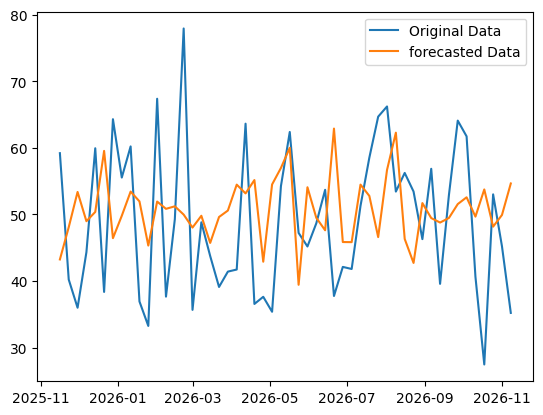

In [165]:
plt.plot(df_test, label='Original Data')
plt.plot(forecast, label='forecasted Data')
plt.legend()
plt.show()

## STL-W

In [211]:
from statsmodels.tsa.seasonal import STL

# Fit the STL-W -model to the training data
stl = STL(df_train,period= 52, robust=True, seasonal= 11)
res = stl.fit()

# Get the seasonal and trend components
seasonal = res.seasonal.values
trend = res.trend.values

result = trend + seasonal

# Generate the forecasts for next 52 weeks
forecast_index = pd.date_range(start= df_test.index[0], periods=52, freq='W')
forecast_data = seasonal[:52] + trend[:52]

# Create a new dataframe for the forecasts
forecast = pd.DataFrame({'Closing Volume':forecast_data}, index=forecast_index)
forecast

,Closing Volume
2025-11-16,45.576242
2025-11-23,55.954432
2025-11-30,55.839117
2025-12-07,51.209270
2025-12-14,40.095775
2025-12-21,38.556662
2025-12-28,49.538053
2026-01-04,51.346996
2026-01-11,59.859939
2026-01-18,37.820458


In [212]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(df_test, forecast))
print('rmse',rmse*100)

# Compute the MAPE
# calculate the absolute percentage error
ape = np.abs((df_test['Closing Volume'].mean() - forecast.mean()) / df_test['Closing Volume'].mean())
# calculate the mean absolute percentage error
mape = (ape) * 100
print("MAPE:", mape)

rmse 1715.6602388757726
MAPE: Closing Volume    3.041055
dtype: float64


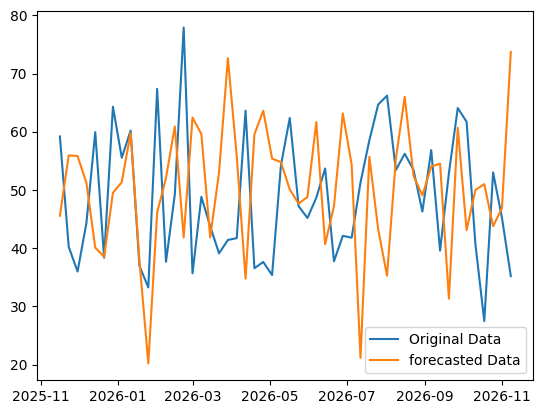

In [213]:
plt.plot(df_test, label='Original Data')
plt.plot(forecast, label='forecasted Data')
plt.legend()
plt.show()

## Future Forecast

In [239]:
from statsmodels.tsa.seasonal import STL

# Fit the STL-W -model to the training data
stl = STL(dff, period= 52, robust=True, seasonal= 11)
res = stl.fit()

# Get the seasonal and trend components
seasonal = res.seasonal.values
trend = res.trend.values

result = trend + seasonal

# Generate the forecasts for next 52 weeks
forecast_index = pd.date_range(start= dff.index[-1], periods=52, freq='W')
forecast_data = seasonal[:52] + trend[:52]

# Create a new dataframe for the forecasts
forecast = pd.DataFrame({'Closing Volume':forecast_data}, index=forecast_index)
forecast

,Closing Volume
2026-11-08,43.519560
2026-11-15,55.414413
2026-11-22,54.973079
2026-11-29,52.054492
2026-12-06,41.364500
2026-12-13,38.844773
2026-12-20,50.138107
2026-12-27,50.574744
2027-01-03,59.565416
2027-01-10,40.788127


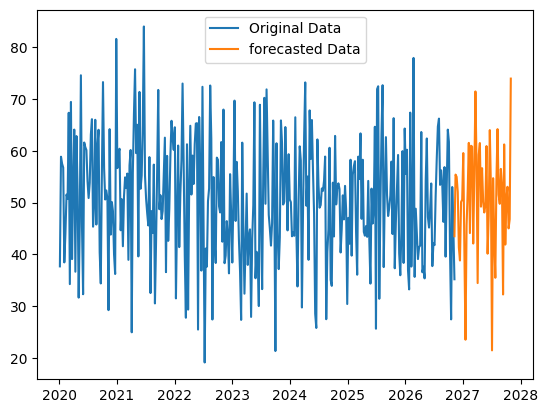

In [240]:
plt.plot(dff, label='Original Data')
plt.plot(forecast, label='forecasted Data')
plt.legend()
plt.show()

## Pipeline building 

In [250]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Custom transformer for data processing
class WeeklyMeanTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert 'Date' column to datetime index
       # X['Date'] = pd.to_datetime(X['Date'])
        X.set_index('Date', inplace=True)

        # Keep only 'Date' and 'Closing' columns
        X = X[['Closing Volume']]

        # Resample to weekly frequency and take mean
        X_weekly = X.resample('W').mean()

        return X_weekly

# Define the pipeline
pipeline0 = Pipeline([
    ('data_processing', WeeklyMeanTransformer())
])




In [254]:

# Apply the pipeline to the dataset
resulting_weekly_mean = pipeline0.transform(df)
resulting_weekly_mean

,Closing Volume
Date,
2020-01-05,37.706855
2020-01-12,58.861535
2020-01-19,57.495570
2020-01-26,56.766915
2020-02-02,38.472842
...,...
2026-10-11,40.649832
2026-10-18,27.479415
2026-10-25,53.016199


In [255]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Custom transformer for STL decomposition and forecasting
class STLForecaster(BaseEstimator, TransformerMixin):
    def __init__(self, period=52, robust=True, seasonal=11):
        self.period = period
        self.robust = robust
        self.seasonal = seasonal

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Fit the STL-W model to the training data
        stl = STL(X, period=self.period, robust=self.robust, seasonal=self.seasonal)
        res = stl.fit()

        # Get the seasonal and trend components
        seasonal = res.seasonal.values
        trend = res.trend.values

        result = trend + seasonal

        # Generate the forecasts for the next 52 weeks
        forecast_index = pd.date_range(start=X.index[-1], periods=52, freq='W')
        forecast_data = seasonal[:52] + trend[:52]

        # Create a new DataFrame for the forecasts
        forecast = pd.DataFrame({'Closing Volume': forecast_data}, index=forecast_index)

        return forecast

# Example usage:
# Assuming 'dff' is the original DataFrame containing the 'Closing Volume' column

# Define the pipeline
pipeline1 = Pipeline([
    ('stl_forecaster', STLForecaster(period=52, robust=True, seasonal=11))
])



In [256]:
# Apply the pipeline to the original DataFrame to get the forecasts
forecast_df = pipeline1.transform(dff)

forecast_df


,Closing Volume
2026-11-08,43.519560
2026-11-15,55.414413
2026-11-22,54.973079
2026-11-29,52.054492
2026-12-06,41.364500
2026-12-13,38.844773
2026-12-20,50.138107
2026-12-27,50.574744
2027-01-03,59.565416
2027-01-10,40.788127


## Saving the pipeline

In [257]:
import joblib
from sklearn.pipeline import Pipeline

# Assume `preprocessing_pipeline` is your preprocessing pipeline object and `model` is your trained ML model object.
pipeline_stockprediction = Pipeline(steps = [
    ('pipeline0', pipeline0),
    ('pipeline1', pipeline1),
])

joblib.dump(pipeline_stockprediction, 'stockprediction_pipeline.joblib')

['stockprediction_pipeline.joblib']

In [261]:
pipeline_stockprediction

Pipeline(steps=[('pipeline0',
                 Pipeline(steps=[('data_processing',
                                  WeeklyMeanTransformer())])),
                ('pipeline1',
                 Pipeline(steps=[('stl_forecaster', STLForecaster())]))])

## Loading the Model

In [262]:
import joblib

# Load the pipeline object from the file.
pipeline_stockprediction = joblib.load('stockprediction_pipeline.joblib')
pipeline_stockprediction

Pipeline(steps=[('pipeline0',
                 Pipeline(steps=[('data_processing',
                                  WeeklyMeanTransformer())])),
                ('pipeline1',
                 Pipeline(steps=[('stl_forecaster', STLForecaster())]))])

In [266]:
result = pipeline_stockprediction.fit_transform(df)
result

,Closing Volume
2026-11-08,43.519560
2026-11-15,55.414413
2026-11-22,54.973079
2026-11-29,52.054492
2026-12-06,41.364500
2026-12-13,38.844773
2026-12-20,50.138107
2026-12-27,50.574744
2027-01-03,59.565416
2027-01-10,40.788127


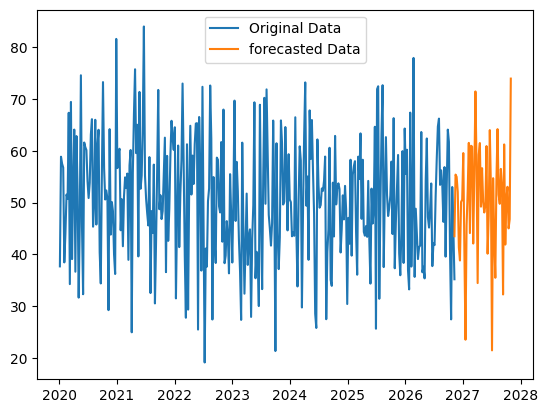

In [267]:
plt.plot(dff, label='Original Data')
plt.plot(result, label='forecasted Data')
plt.legend()
plt.show()

# The EnD